# IIIF API access tutorial &mdash; notebookerised

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/International_Image_Interoperability_Framework_logo.png" align="left"></img>

## This notebook:
- follows [the tutorial](https://wiki.bl.uk:8443/pages/viewpage.action?pageId=139627026&preview=/139627026/152076291/3%20Handson%20notes.pdf) developed by Owen Stephens on behalf of the British Library under a [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/) licence to access the IIIF API at the BL
- applies it in a Jupyter notebook.

## APIs
>There are many different types of API, and they don't all work in the same way. However, broadly the user of the API (e.g. the developer or the software written by the developer) makes a request to the API, and gets back a response  

   *&mdash; Owen Stephens*  
   
   
Requests to APIs are termed 'API calls' and generally follow the convention of 'get', 'post', 'request' etc. APIs should be properly documented to list all calls available to users of the API.

### IIIF API
The IIIF API is documented [here](http://iiif.io/api/image/2.1/).   

Two requests available:
- “Image Request” - returns an image
- “Image Information Request” - gets back image metadata


## Image request 

Image request API call takes the form

```{scheme}://{server}{/prefix}/{identifier}/{region}/{size}/{rotation}/{quality}.{format}```

Non-BL example: https://iiif.bodleian.ox.ac.uk/iiif/image/a1795520-e3c8-44a0-a077-c80a398978b9/full/full/0/default.jpg

|Parameter|Value|Description |
| ------------- |-------------|------|
| Scheme | https| With server and prefix, forms address where API request is made |
| Server | iiif.bodleian.ox.ac.uk |  |
| Prefix | iiif/image | |
| Identifier | a1795520-e3c8-44a0-a077-c80a398978b9 | identifier for the digital object you want the API to use in response|
| region | full | portion of the object to return - here it's all of it| 
| size | full | return a full sized object| 
| rotation | 0 | return the object with 0 degrees rotation|
| quality | default | Should API respond with a colour, gray scale, or bitonal image. Default returns the default for the image|
| format | jpg | file format to send response in, returns a jpeg image|




### Building the request

Import the libraries...

In [7]:
import requests as rq
from PIL import Image
from io import BytesIO

In [8]:
base_url =  'https://iiif.bodleian.ox.ac.uk/iiif/image'

In [9]:
identifier = 'a1795520-e3c8-44a0-a077-c80a398978b9'

In [10]:
region = 'full'
size = 'pct:30'
rotation = '0'
quality = 'default'
iformat = 'jpg'

In [11]:
api_request = base_url + '/' + identifier + '/' + region + '/' + size + '/'+ rotation + '/'+ quality + '.' + iformat
api_request

'https://iiif.bodleian.ox.ac.uk/iiif/image/a1795520-e3c8-44a0-a077-c80a398978b9/full/pct:30/0/default.jpg'

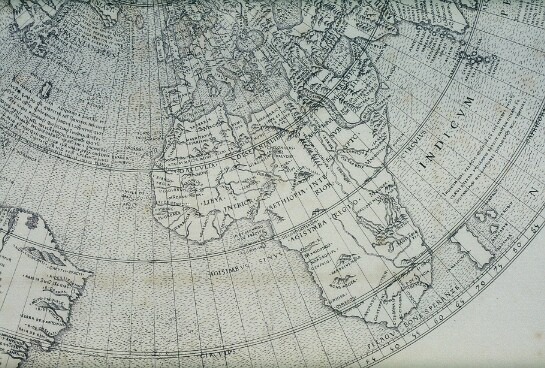

In [12]:
response=rq.get(api_request)
img = Image.open(BytesIO(response.content))
img

### Changing the rotation
Prepending an exclamation mark mirrors the image, for example. Can also rotate in multiples of 90 degrees, or other angles where supported

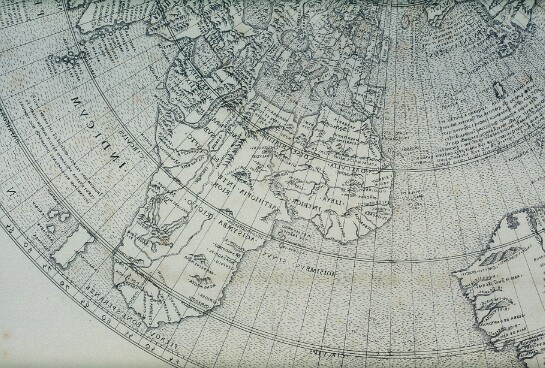

In [13]:
rotation='!0'
api_request = base_url + '/' + identifier + '/' + region + '/' + size + '/'+ rotation + '/'+ quality + '.' + iformat
response=rq.get(api_request)
img = Image.open(BytesIO(response.content))
img

### Selecting a region of the object
The argument ```region='125,15,500,500'``` asks the API to return a 500 x 500 pixel rectangle from the original image starting 125 pixels from the left of the image and 15 pixels from the top of the image


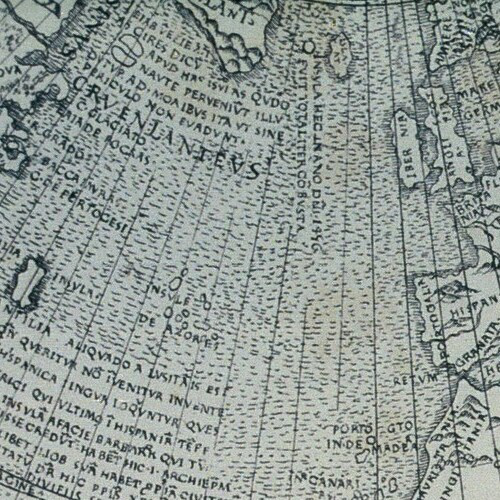

In [14]:
region='125,15,500,500'
size='full'
rotation = '0'
quality = 'default'
iformat = 'jpg'
api_request = base_url + '/' + identifier + '/' + region + '/' + size + '/'+ rotation + '/'+ quality + '.' + iformat
response=rq.get(api_request)
img = Image.open(BytesIO(response.content))
img

You have:
- Created a request/call for the IIIF image request API by constructing a URL with appropriate parameters
- Retrieved an Image using the IIIF Image Request API
- Modified the request to control how the image is returned to you

### Requesting BL images

This notebook will work with any service which supports the IIIF Image Request API. Try this with the BL service!

In [15]:
base_url =  'http://api.bl.uk/image/iiif'
identifier = 'ark:/81055/vdc_100004173859.0x000002'
#identifier = 'ark:/81055/vdc_100023606675.0x000001'
region='full'
size='pct:10'
rotation = '0'
quality = 'default'
iformat = 'jpg'

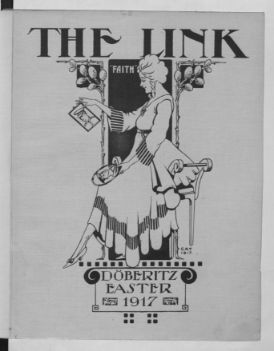

In [16]:
api_request = base_url + '/' + identifier + '/' + region + '/' + size + '/'+ rotation + '/'+ quality + '.' + iformat
response=rq.get(api_request)
img = Image.open(BytesIO(response.content))
img

In [17]:
api_request

'http://api.bl.uk/image/iiif/ark:/81055/vdc_100004173859.0x000002/full/pct:10/0/default.jpg'

## Image metadata request via the IIIF presentation API

 - More complex than the image request API!

In [18]:
import json

Request an image manifest from the Bodleian:

``` http://iiif.bodleian.ox.ac.uk/iiif/manifest/{identifier}.json ```

In [19]:
base_url='http://iiif.bodleian.ox.ac.uk/iiif/manifest'
identifier='a1795520-e3c8-44a0-a077-c80a398978b9'
api_request = base_url + '/' + identifier + '.json'

JavaScript Object Notation (JSON) is a way of structuring data. There are three basic structures in JSON:
- Name/value pairs: The 'value' part might typically be a piece of text or a number, but it can be other things as well
- groups of name/value pairs surrounded by curly brackets are called objects. An object can also be the 'value' part of a name/value pair
- a list of values or objects surrounded by square brackets is called an array: An array can also be the 'value' part of a name/value pair

Get the response in (nicely parsed) json

In [20]:
response=rq.get(api_request)
response.json()

{'@context': 'http://iiif.io/api/presentation/2/context.json',
 '@id': 'https://iiif.bodleian.ox.ac.uk/iiif/manifest/a1795520-e3c8-44a0-a077-c80a398978b9.json',
 '@type': 'sc:Manifest',
 'label': 'Bodleian Library B1 a.10, map sheet 39',
 'description': '[Africa]',
 'metadata': [{'label': 'Homepage',
   'value': '<span><a href="https://digital.bodleian.ox.ac.uk/inquire/p/a1795520-e3c8-44a0-a077-c80a398978b9">View on Digital Bodleian</a></span>'},
  {'label': 'Title', 'value': '[Africa]'},
  {'label': 'Language', 'value': 'Latin'},
  {'label': 'Date Statement', 'value': '1849'},
  {'label': 'Description',
   'value': '"Mappemonde de Ruych de 1508, renfermant les dernieres decouvertes faitee jusqu\'a cette epoque", in Vicomte de Santarem, Atlas compose de Mappe-mondes'},
  {'label': 'Extent', 'value': '35mm slide'},
  {'label': 'Collection', 'value': 'Maps and Atlases'},
  {'label': 'Collection', 'value': 'Images from 35mm Slides and Filmstrips'},
  {'label': 'Subject', 'value': 'Africa 

In the above example ```metadata``` is the name of an array, for example, and  
```
'rendering': {'@id': 'https://digital.bodleian.ox.ac.uk/inquire/p/a1795520-e3c8-44a0-a077-c80a398978b9',
  'label': 'View on Digital Bodleian',
  'format': 'text/html'},
```  
is an object with the name ```rendering```

### BL general manifest requests 

A BL manifest request is constructed in the following way:
    
```https://api.bl.uk/metadata/iiif/{ark_identifier}/manifest.json```

For a BL example, the request would be:

In [21]:
base_url =  'http://api.bl.uk/metadata/iiif'
identifier = 'ark:/81055/vdc_100023606675.0x000001'
api_request=base_url + '/' + identifier +'/' + "manifest.json"
response=rq.get(api_request)
rjson_bl=response.json()

### BL EAP-specific manifest requests

British Library Endangered Archive Programme (EAP)-specific manifest requests are constructed as follows:  
```https://eap.bl.uk/archive-file/{EAP_project_identifier}/manifest```


In [22]:
base_url = 'https://eap.bl.uk/archive-file/'
eap_identifier='EAP755-1-1-148'
api_request = base_url + eap_identifier + '/manifest'
response=rq.get(api_request)
rjson_eap=response.json()

From the tutorial:
<img src="JSON_structure.png"></img>

The json manifest is returned as a python dict. Extract all values in the 'metadata' array:

In [23]:
rjson_eap['metadata']

[{'label': 'Identifier', 'value': 'EAP755/1/1/148'},
 {'label': 'Title', 'value': 'Boats'},
 {'label': 'Place', 'value': 'Argentina, South America'},
 {'label': 'Link to catalogue record',
  'value': '<a href="https://eap.bl.uk/archive-file/EAP755-1-1-148">View the catalogue record</a>'},
 {'label': 'Citation',
  'value': 'Boats, British Library, EAP755/1/1/148, https://eap.bl.uk/archive-file/EAP755-1-1-148'},
 {'label': 'Digitised by', 'value': 'Universidad Nacional de Tres de Febrero'},
 {'label': 'Digitisation funded by',
  'value': 'Endangered Archives Programme supported by Arcadia'},
 {'label': 'Language', 'value': None},
 {'label': 'Scripts', 'value': None}]

In [24]:
rjson_bl['metadata']

[{'label': 'Identifier', 'value': 'Digital Store 11900.c.68.'},
 {'label': 'Held by',
  'value': '<span><a href="https://www.bl.uk">The British Library</a></span>'},
 {'label': 'Title',
  'value': 'Planum egy tökélletes Magyar Bibliografia és szókönyv iránt. [The scheme of M. G. and J. N. Kovachich with a recommendatory introduction by G. Döbrentei.]'},
 {'label': 'Place', 'value': 'Pesten'},
 {'label': 'Date', 'value': '1814'},
 {'label': 'Language', 'value': 'Hungarian'},
 {'label': 'Catalogue record',
  'value': '<a href="http://explore.bl.uk/primo_library/libweb/action/dlDisplay.do?docId=BLL01016944570&amp;vid=BLVU1&amp;lang=en_US&amp;institution=BL">View the catalogue record</a>'},
 {'label': 'Digitised from',
  'value': '<a href="http://explore.bl.uk/primo_library/libweb/action/dlDisplay.do?docId=BLL01001767515&amp;vid=BLVU1&amp;lang=en_US&amp;institution=BL">Planum egy tökélletes Magyar Bibliografia és szókönyv iránt. [The scheme of M. G. and J. N. Kovachich with a 

You've now retrieved and displayed images and accompanying metadata from the British Library general and EAP collections - replace the image identifier with another and it (should) work fine!

## Using linked data

The British National Bibliography (BNB) is published as linked data. Get the json link:

In [25]:
bnl_url = 'http://bnb.data.bl.uk/doc/person/DuffyCarolAnn.json'

In [26]:
response=rq.get(bnl_url).json()

In [27]:
response

{'format': 'linked-data-api',
 'version': '0.2',
 'result': {'_about': 'http://bnb.data.bl.uk/doc/person/DuffyCarolAnn.json',
  'license': 'http://creativecommons.org/publicdomain/zero/1.0/',
  'definition': 'http://bnb.data.bl.uk/api#person',
  'extendedMetadataVersion': 'http://bnb.data.bl.uk/doc/person/DuffyCarolAnn.json?_metadata=all%2Cviews%2Cformats%2Cexecution%2Cbindings%2Csite',
  'inDataset': 'http://bnb.data.bl.uk/id/data/BNB',
  'label': 'Duffy, Carol Ann',
  'primaryTopic': {'_about': 'http://bnb.data.bl.uk/id/person/DuffyCarolAnn',
   'name': 'Carol Ann Duffy',
   'isLike': ['http://isni.org/isni/0000000109376504',
    'http://www.wikidata.org/entity/Q237994'],
   'hasContributedTo': [{'_about': 'http://bnb.data.bl.uk/id/resource/010047180',
     'label': 'Overheard on a saltmarsh'},
    {'_about': 'http://bnb.data.bl.uk/id/resource/018191304',
     'label': 'To the Moon'},
    {'_about': 'http://bnb.data.bl.uk/id/resource/010047323',
     'label': 'Hand in hand'},
    {'_

Get both the author's name as used in the BNB ('label') and VIAF ID ('sameAs')

In [28]:
response['result']['primaryTopic']['label']

'Duffy, Carol Ann'

In [29]:
response['result']['primaryTopic']['sameAs']

'http://viaf.org/viaf/114321106'

### Printing the full author name:

In [30]:
print("{} {}".format(response['result']['primaryTopic']['givenName'],response['result']['primaryTopic']['familyName']))

Carol Ann Duffy


### Getting more information from VIAF

VIAF provide different types of data in several different formats. In this case you are going to retrieve a list of IDs that VIAF knows about for a person, in JSON format. The URL pattern used to request this data is:  

```http://viaf.org/viaf/{VIAF ID}/justlinks.json```

Retrieving the BNF (Bibliothèque nationale de France) ID, the ISNI and a list of Wikipedia URLs:

In [31]:
viaf_url=response['result']['primaryTopic']['sameAs']
viaf_request= viaf_url + '/' + 'justlinks.json'
response=rq.get(viaf_request).json()

In [41]:
response

{'viafID': '114321106',
 'BIBSYS': ['90701591'],
 'BNC': ['.a10430246'],
 'BNE': ['XX5015405'],
 'BNF': ['http://catalogue.bnf.fr/ark:/12148/cb12540689c'],
 'DBC': ['870979.68263409'],
 'DNB': ['http://d-nb.info/gnd/121244199'],
 'ISNI': ['0000000109376504'],
 'J9U': ['987007442633305171'],
 'KRNLK': ['KAC200409314'],
 'LC': ['n86014747'],
 'LNB': ['LNC10-000056140'],
 'N6I': ['vtls000291738'],
 'NDL': ['001093934'],
 'NII': ['DA0903832X'],
 'NKC': ['pna2005307448'],
 'NLA': ['000035047930'],
 'NLI': ['002299912'],
 'NSK': ['000429685'],
 'NTA': ['074529218'],
 'NUKAT': ['vtls002072169'],
 'PLWABN': ['9810596798505606'],
 'RERO': ['vtls003195671'],
 'SELIBR': ['b8nrxs2v2jn44zl'],
 'SUDOC': ['034677100'],
 'WKP': ['Q237994'],
 'Identities': ['https://www.worldcat.org/identities/lccn-n86014747'],
 'Wikipedia': ['https://ar.wikipedia.org/wiki/كارول_آن_دفي',
  'https://br.wikipedia.org/wiki/Carol_Ann_Duffy',
  'https://cs.wikipedia.org/wiki/Carol_Ann_Duffyová',
  'https://cy.wikipedia.org/

WKP is the wikidata identifier

In [43]:
response['Identities']

['https://www.worldcat.org/identities/lccn-n86014747']

This returns a single item list, so access the first (only) element to get the URL

In [34]:
bnfLink=response['BNF'][0]

In [35]:
bnfLink

'http://catalogue.bnf.fr/ark:/12148/cb12540689c'

In [36]:
wikiLinks=response['Wikipedia']
wikiLinks

['https://ar.wikipedia.org/wiki/كارول_آن_دفي',
 'https://br.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://cs.wikipedia.org/wiki/Carol_Ann_Duffyová',
 'https://cy.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://de.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://en.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://eo.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://es.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://fi.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://fr.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://he.wikipedia.org/wiki/קרול_אן_דאפי',
 'https://id.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://it.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://ka.wikipedia.org/wiki/კეროლ_ენ_დაფი',
 'https://la.wikipedia.org/wiki/Carola_Anna_Duffy',
 'https://nl.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://no.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://pl.wikipedia.org/wiki/Carol_Ann_Duffy',
 'https://ru.wikipedia.org/wiki/Даффи,_Кэрол_Энн',
 'https://sco.wikipedia.org/wiki/Carol_Ann_Duffy',
 

In [37]:
ISNILinks=response['ISNI']
ISNILinks

['0000000109376504']

### Doing more with the data - Wikipedia example

Can take this further using the wikipedia links for example

From wikipedia API documentation, requests to the REST API can be formed like   
```https://en.wikipedia.org/api/rest_v1/page/summary/{article_identifier}```

Fetch a snippet of the article summary:

In [38]:
base_wiki_url='https://en.wikipedia.org/api/rest_v1/page/summary/'
eng_lang_articles=[x for x in wikiLinks if 'en' in x]
article_identifier=eng_lang_articles[0].split('/')[-1]
article_identifier

'Carol_Ann_Duffy'

In [39]:
wiki_api_request = base_wiki_url + article_identifier
wikiresponse=rq.get(wiki_api_request).json()
wikiresponse['extract']

"Dame Carol Ann Duffy is a British poet and playwright. She is a professor of contemporary poetry at Manchester Metropolitan University, and was appointed Britain's Poet Laureate in May 2009, resigning in 2019. She was the first woman, the first Scottish-born poet, and the first LGBT poet to hold the position."

Possible to get the full intro section with the following

In [40]:
base_url='https://en.wikipedia.org/w/api.php?format=json&action=query&prop=extracts&exintro&explaintext&redirects=1&titles='
wiki_title=article_identifier=eng_lang_articles[0].split('/')[-1]
wiki_fullIntro=rq.get(base_url+wiki_title).json()['query']['pages']['166848']['extract']
wiki_fullIntro

"Dame Carol Ann Duffy  (born 23 December 1955) is a British poet and playwright. She is a professor of contemporary poetry at Manchester Metropolitan University, and was appointed Britain's Poet Laureate in May 2009, resigning in 2019. She was the first woman, the first Scottish-born poet, and the first LGBT poet to hold the position.Her collections include Standing Female Nude (1985), winner of a Scottish Arts Council Award; Selling Manhattan (1987), which won a Somerset Maugham Award; Mean Time (1993), which won the Whitbread Poetry Award; and Rapture (2005), winner of the T. S. Eliot Prize. Her poems address issues such as oppression, gender, and violence in an accessible language that has made them popular in schools.\n\n"

Decide which is easier, or gets you the information you need!